In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Get the path to the desktop folder
desktop_path = os.path.expanduser('~/Desktop/New folder/2045-With all assignement fields')

# Construct the full file path
PMOD_path = os.path.join(desktop_path, 'PM Total OD.xlsx')
TAZ_path = os.path.join(desktop_path, 'TAZ.xlsx')



In [3]:

# Load matrix from Excel sheet (Orig-destination matrix)
matrix_df = pd.read_excel(PMOD_path, sheet_name='Total')

# Load population and employment data from another Excel sheet
pop_emp_df = pd.read_excel(TAZ_path, sheet_name='Sheet1')

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no stylesheet, using openpyxl's defaults
  warn("Workbook contains no stylesheet, using openpyxl's defaults")


In [4]:
# Convert cell values to floats
matrix_df = matrix_df.apply(pd.to_numeric, errors='coerce')

# Replace '--' values with 0
matrix_df = matrix_df.fillna(0)

In [5]:

# Calculate the sum of rows in the OD matrix
matrix_df['ODTotal'] = matrix_df.drop('Origins', axis=1).sum(axis=1)

In [6]:
for row in matrix_df:
    for cell in row:
        value_type = type(cell)
        print(f"Value: {cell}, Type: {value_type}")

Value: O, Type: <class 'str'>
Value: r, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: g, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: n, Type: <class 'str'>
Value: s, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 4, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 6, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 7, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 9, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, 

In [7]:
matrix_df

,Origins,1001,1004,1006,1007,1009,1011,1012,1013,1014,...,49040,49041,49042,49043,49044,49045,49046,49047,49048,ODTotal
0,1001,0.000000,14.642595,65.055382,0.827911,1.390403,9.637543,3.861245,1.786963,0.245865,...,4.282500,0.015734,0.029681,0.047727,0.134352,0.057422,0.255118,0.016348,0.008162,345.457335
1,1004,13.088225,0.000000,67.157501,2.358976,1.091906,6.052638,3.338250,1.532777,0.161279,...,2.720415,0.008222,0.022184,0.034809,0.162537,0.039993,0.215686,0.011602,0.006033,276.381915
2,1006,87.408958,95.241920,0.000000,7.931828,2.414075,52.256519,22.234829,7.924678,0.562128,...,7.977463,0.035649,0.071233,0.105242,0.445246,0.129446,0.869050,0.044442,0.014204,739.475603
3,1007,1.310902,3.817333,8.995372,0.000000,0.263734,4.415530,8.704394,6.872036,0.793818,...,1.780290,0.020372,0.021950,0.033391,0.175916,0.043288,0.344655,0.015234,0.002233,120.561508
4,1009,2.394333,1.942157,3.055181,0.246335,0.000000,4.678809,4.784122,1.601111,0.293178,...,24.889698,0.023915,0.036776,0.045710,0.152568,0.053275,0.300068,0.019053,0.080277,522.938437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,49044,0.059954,0.116599,0.222331,0.057677,0.051086,0.118592,0.652895,0.439887,1.707330,...,0.527956,0.005205,0.009034,0.012851,0.000000,5.210624,0.050531,0.005508,0.001476,176.229212
5348,49045,0.107462,0.085359,0.191669,0.043859,0.056720,0.166032,0.779756,0.571296,0.224895,...,0.722751,0.009517,0.011609,0.017402,6.950490,0.000000,0.149500,0.008159,0.001280,106.585706
5349,49046,0.197516,0.179326,0.484841,0.124128,0.130310,0.480043,1.839759,0.978793,0.232344,...,1.584189,2.218780,0.595920,1.129050,0.107625,0.063269,0.000000,3.169727,0.003981,770.010583
5350,49047,0.016468,0.015042,0.035815,0.007827,0.010090,0.034340,0.131368,0.059171,0.014853,...,0.139219,0.100837,0.058602,0.107295,0.011588,0.004242,2.701524,0.000000,0.000222,82.360850


In [8]:
pop_emp_df

,ID,Area,TAZ,COUNTY,COUNTY_CODE,ADJACENT_COUNTY,Land_Area,Water_Area,Total_Area,TAD10,...,2036 POP,2036 Basic,2036 Retail,2036 Service,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service,Unnamed: 39
0,4915,16.765556,42001,Ellis,139.0,NaN,16.750978,0.002328,16.753306,7.208340e+15,...,1527,444,30,269,545,59371,2646,49,689,3384
1,5291,41.615955,42005,Ellis,139.0,NaN,41.295078,0.289960,41.585038,7.208340e+15,...,1184,702,0,50,452,48357,4857,469,6274,11600
2,5339,1.194887,21044,External,NaN,Ellis,1.194017,0.000873,1.194890,NaN,...,0,0,0,0,0,45253,4182,201,8184,12567
3,5084,21.771454,18076,Kaufman,257.0,NaN,21.602233,0.152763,21.754996,7.208340e+15,...,943,63,5,268,381,43529,444,30,271,745
4,5292,21.466690,17100,Ellis,139.0,NaN,21.374513,0.075937,21.450450,7.208340e+15,...,231,13,0,7,95,38869,287,50,1598,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,5365,1.039986,21018,External,NaN,Hunt,1.039324,0.000661,1.039985,NaN,...,0,0,0,0,0,0,0,0,0,0
5348,5259,3.628747,20004,Hunt,231.0,NaN,3.410847,0.215542,3.626389,7.208340e+15,...,619,137,21,178,232,0,0,0,0,0
5349,5263,1.345450,20001,Hunt,231.0,NaN,1.129716,0.214874,1.344590,7.208340e+15,...,185,1,0,7,63,0,0,0,0,0
5350,5279,0.639569,20016,Hunt,231.0,NaN,0.609337,0.029795,0.639132,7.208340e+15,...,207,2,0,29,71,0,0,0,0,0


In [9]:
print(pop_emp_df.dtypes)

ID                   int64
Area               float64
TAZ                  int64
COUNTY              object
COUNTY_CODE        float64
ADJACENT_COUNTY     object
Land_Area          float64
Water_Area         float64
Total_Area         float64
TAD10              float64
TRACT_GEOID10      float64
BG_GEOID10         float64
NonDowntownAM        int64
NonDowntownOP        int64
MPA9                 int64
MPA12               object
Airport             object
External             int64
CBD                  int64
2023 HHOLD           int64
2023 POP             int64
2023 Basic           int64
2023 Retail          int64
2023 Service         int64
2026 HHOLD           int64
2026 POP             int64
2026 Basic           int64
2026 Retail          int64
2026 Service         int64
2036 HHOLD           int64
2036 POP             int64
2036 Basic           int64
2036 Retail          int64
2036 Service         int64
2045 HHOLD           int64
2045 POP             int64
2045 Basic           int64
2

In [10]:
print(matrix_df.columns)

Index(['Origins', '1001', '1004', '1006', '1007', '1009', '1011', '1012',
       '1013', '1014',
       ...
       '49040', '49041', '49042', '49043', '49044', '49045', '49046', '49047',
       '49048', 'ODTotal'],
      dtype='object', length=5354)


In [11]:
#New dataframe with only origins and OD table
reg_2045_df=matrix_df.iloc[:,[0,-1]]

In [12]:
reg_2045_df

,Origins,ODTotal
0,1001,345.457335
1,1004,276.381915
2,1006,739.475603
3,1007,120.561508
4,1009,522.938437
...,...,...
5347,49044,176.229212
5348,49045,106.585706
5349,49046,770.010583
5350,49047,82.360850


In [13]:
#List the columns selected to be appended to the reg_2045_df dataframe
selected_col_pop_emp_df=["TAZ","Area","2045 HHOLD","2045 POP","2045 Basic","2045 Retail","2045 Service"]

In [14]:
# Merge based on "Origins" in data_df and "TAZ" in other_df
reg_2045_df = reg_2045_df.merge(pop_emp_df[selected_col_pop_emp_df], left_on="Origins", right_on="TAZ", how="left")


In [15]:
reg_2045_df

,Origins,ODTotal,TAZ,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,1001,345.457335,1001,10.214340,245,5675,2179,238,2160
1,1004,276.381915,1004,1.635124,216,5733,123,12,913
2,1006,739.475603,1006,8.540456,289,5757,141,76,1165
3,1007,120.561508,1007,12.631117,25,5701,1,73,275
4,1009,522.938437,1009,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...,...,...,...
5347,49044,176.229212,49044,21.368008,235,1172,69,50,660
5348,49045,106.585706,49045,10.720568,16,3147,173,6,364
5349,49046,770.010583,49046,10.383058,671,1168,100,965,2678
5350,49047,82.360850,49047,7.469014,70,1167,252,74,1414


In [16]:
#Check for merged right
row_1001 = pop_emp_df[pop_emp_df['TAZ'] == 1001]
row_1001

reg_2045_df.columns

Index(['Origins', 'ODTotal', 'TAZ', 'Area', '2045 HHOLD', '2045 POP',
       '2045 Basic', '2045 Retail', '2045 Service'],
      dtype='object')

In [17]:
#Select variables for linear regression
independent_variable = reg_2045_df[['Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']]
dependent_variable = reg_2045_df['ODTotal']

In [18]:
independent_variable 


,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,10.214340,245,5675,2179,238,2160
1,1.635124,216,5733,123,12,913
2,8.540456,289,5757,141,76,1165
3,12.631117,25,5701,1,73,275
4,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...
5347,21.368008,235,1172,69,50,660
5348,10.720568,16,3147,173,6,364
5349,10.383058,671,1168,100,965,2678
5350,7.469014,70,1167,252,74,1414


In [19]:
dependent_variable

0       345.457335
1       276.381915
2       739.475603
3       120.561508
4       522.938437
           ...    
5347    176.229212
5348    106.585706
5349    770.010583
5350     82.360850
5351     11.404310
Name: ODTotal, Length: 5352, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                ODTotal   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     119.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          9.41e-142
Time:                        11:13:54   Log-Likelihood:                -49135.
No. Observations:                5352   AIC:                         9.828e+04
Df Residuals:                    5345   BIC:                         9.833e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1337.1795     48.002     27.857   

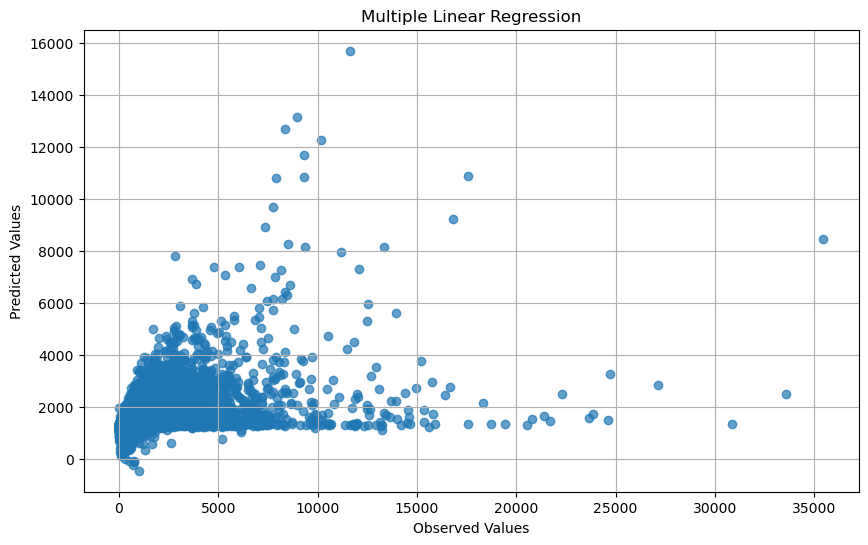

In [20]:
# Add a constant term to the independent variables
independent_variable = sm.add_constant(independent_variable)

# Fit the multiple linear regression model
model = sm.OLS(dependent_variable, independent_variable).fit()

# Print the regression summary
print(model.summary())

# Plot the regression lines
plt.figure(figsize=(10, 6))

plt.scatter(dependent_variable, model.predict(independent_variable), alpha=0.7)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.grid(True)
plt.show()

In [21]:
equation = f'ODTotal = {model.params[0]} + {model.params[1]} * Area + {model.params[2]} * 2045 HHOLD+ {model.params[3]} * 2045 POP+ {model.params[4]} * 2045 Basic+ {model.params[5]} * 2045 Retail+ {model.params[6]} * 2045 Service'

In [22]:
print("Equation of the Regression Plane:")
print(equation)

Equation of the Regression Plane:
ODTotal = 1337.1794892341761 + -32.795628364472705 * Area + 0.8414674596206697 * 2045 HHOLD+ -0.013704956608444412 * 2045 POP+ 0.06739379407226384 * 2045 Basic+ -0.09642198396654797 * 2045 Retail+ -0.011866737347432111 * 2045 Service


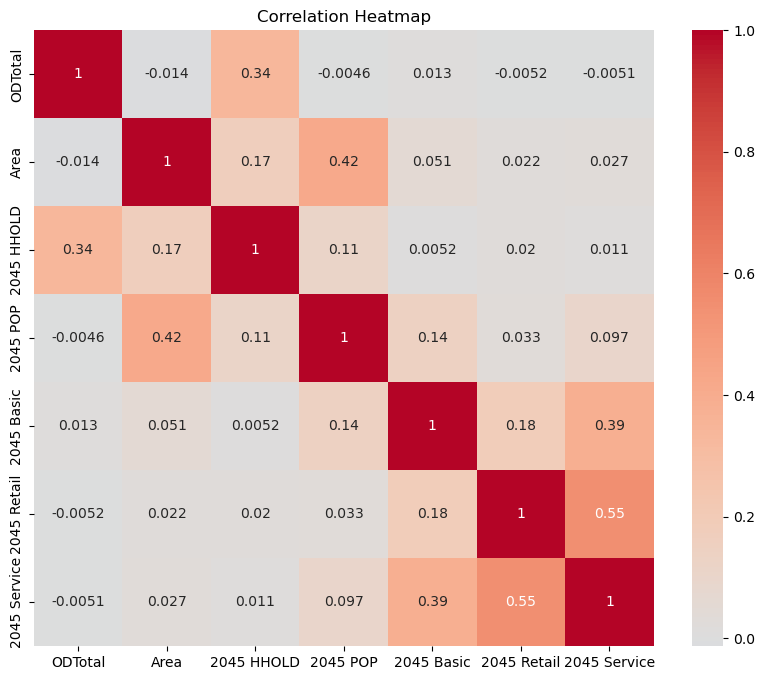

In [25]:
# Select the columns for correlation analysis
columns_of_interest = ['ODTotal', 'Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']

# Compute the correlation matrix for selected columns
correlation_matrix = reg_2045_df[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()